# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis


## Problem Statment

tracking traffic accidents and help reduce injuries , deaths and accidents on the road ,  and can be given solution to the authorities that may contribute to their attempts to less the loss that is happing in accedint ,deaths, injuries and cost.


## Executive Summary



we using two datasets to analysis 

- dataset showing number of accidents across region for years 2016 - 2017 and datasets 

- driving licenses dataset that shows number of driving licenses issued from 1993 - 2017

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
#Imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes..

In [2]:
driving_licenses = pd.read_csv('saudi-arabia-driving-licenses-2004-2008.csv', sep= ';' )
traffic_accidents = pd.read_csv('saudi-arabia-traffic-accidents-2008.csv' , sep= ';')


#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code
driving_licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [4]:
traffic_accidents.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

#### Answer:

#### traffic_accidents:
This data contain the number of traffic accidents and also the year , region and  the geographic place of traffic accidents.

#### driving_licenses :
This data contain the number of driving licenses and also the year , region and  the geographic place of driving licenses.



#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
#Code
driving_licenses.isnull().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [6]:
traffic_accidents.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:

driving_licenses.describe()

,Unnamed: 0
count,350.000000
mean,174.500000
std,101.180532
min,0.000000
25%,87.250000
50%,174.500000
75%,261.750000
max,349.000000


In [8]:
driving_licenses.max()

Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

In [9]:
driving_licenses.min()

Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

In [10]:
traffic_accidents.describe()

,Unnamed: 0,Unnamed: 0.1
count,84.000000,84.000000
mean,41.500000,41.500000
std,24.392622,24.392622
min,0.000000,0.000000
25%,20.750000,20.750000
50%,41.500000,41.500000
75%,62.250000,62.250000
max,83.000000,83.000000


In [11]:
traffic_accidents.max()

Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object

In [12]:
traffic_accidents.min()

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#code
driving_licenses.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

In [14]:
traffic_accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Answer:

#### Traffic_Accidents

Unnamed: 0.1   - - -   i think is not importent

Year      - - -       change to int type

Region   - - -       contain of city

Indicator       

Value    - - -       change to int type

geo_point_2d  - - -   contain of atitude and longtitude

#### Driving_Licenses

Unnamed: 0      - - -       i think is not importent

Year           - - -        change to int type

Administritive Area  - - -  contain of city

Driving Liceses     - - -    change to int type

geo_point_2d     - - -      contain of atitude and longtitude

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
#code

def to_num(driving_licenses , column_list):
        driving_licenses[column_list] = driving_licenses[column_list].apply(pd.to_numeric )
       

In [16]:
driving_licenses.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

In [17]:
traffic_accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

- Make new columns `x` and `y` using `geo_point_2d`

In [18]:
#code
driving_licenses[['x', 'y']] = driving_licenses.geo_point_2d.str.split(",",expand=True)

driving_licenses = driving_licenses.rename(columns = {'x':'latitude', 'y':'longitude'})

driving_licenses = driving_licenses.drop('geo_point_2d', axis=1)

driving_licenses.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,latitude,longitude
0,0,(2012),Makkah,143954n,21.628962766,41.2636898334
1,1,(1994),Makkah,75349n,21.628962766,41.2636898334
2,2,(1998),Makkah,86082n,21.628962766,41.2636898334
3,3,(2004),Makkah,86636n,21.628962766,41.2636898334
4,4,(2005),Makkah,65099n,21.628962766,41.2636898334


In [19]:
traffic_accidents[['x','y']] = traffic_accidents.geo_point_2d.str.split(",",expand=True)

traffic_accidents = traffic_accidents.rename(columns = { 'x':'latitude'  , 'y':'longitude'  })

traffic_accidents = traffic_accidents.drop('geo_point_2d', axis=1)

traffic_accidents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,latitude,longitude
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,21.628962766,41.2636898334
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,23.2883307307,50.1478302439
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,27.90165499,37.2598581394
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,27.400845724,41.4406960508
4,4,4,(2016),Hail,No. of Accidents,10199n,27.400845724,41.4406960508


- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
traffic_accidents = traffic_accidents.loc [: ,'Year' : 'longitude' ]

In [21]:
traffic_accidents.head()

,Year,Region,Indicator,Value,latitude,longitude
0,(2016),Makkah,No. of Casualties - Injured,12383n,21.628962766,41.2636898334
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,23.2883307307,50.1478302439
2,(2016),Tabouk,No. of Casualties - Dead,434n,27.90165499,37.2598581394
3,(2016),Hail,No. of Casualties - Dead,299n,27.400845724,41.4406960508
4,(2016),Hail,No. of Accidents,10199n,27.400845724,41.4406960508


In [22]:
driving_licenses = driving_licenses.loc [: , 'Year' : 'longitude']

In [23]:
driving_licenses.head()

,Year,Administritive Area,Driving Liceses,latitude,longitude
0,(2012),Makkah,143954n,21.628962766,41.2636898334
1,(1994),Makkah,75349n,21.628962766,41.2636898334
2,(1998),Makkah,86082n,21.628962766,41.2636898334
3,(2004),Makkah,86636n,21.628962766,41.2636898334
4,(2005),Makkah,65099n,21.628962766,41.2636898334


In [24]:
driving_licenses.Year = driving_licenses.Year.str.replace('(','').str.replace(')' ,'')
traffic_accidents.Year = traffic_accidents.Year.str.replace('(','').str.replace(')' ,'')

In [25]:
to_num(driving_licenses, [ 'Year'] )

In [26]:
traffic_accidents['Year'] = traffic_accidents['Year'].apply(pd.to_numeric )

In [27]:
def remove_n(n):
    number=int(n.replace('n',''))
    return number

driving_licenses['Driving Liceses'] = driving_licenses['Driving Liceses'].apply(remove_n)

traffic_accidents.Value = traffic_accidents.Value.apply(remove_n)

In [28]:
driving_licenses.head()

,Year,Administritive Area,Driving Liceses,latitude,longitude
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


In [29]:
traffic_accidents.head()


,Year,Region,Indicator,Value,latitude,longitude
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


- Finish your data modifications by making sure the columns are now typed appropriately.

In [30]:
#  I'm do it up in number 6 

- Display the data types again to confirm they are correct.

In [31]:
#Code:
driving_licenses.dtypes 

Year                    int64
Administritive Area    object
Driving Liceses         int64
latitude               object
longitude              object
dtype: object

In [32]:
traffic_accidents.dtypes

Year          int64
Region       object
Indicator    object
Value         int64
latitude     object
longitude    object
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [33]:
#code
driving_licenses.columns

Index(['Year', 'Administritive Area', 'Driving Liceses', 'latitude',
       'longitude'],
      dtype='object')

In [34]:
driving_licenses.rename(columns={'Year':'year',
                    'Administritive Area':'admin_area',
                    'Driving Liceses':'driving_licenses'} , inplace=True)

driving_licenses.head()

,year,admin_area,driving_licenses,latitude,longitude
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


In [35]:
traffic_accidents.columns

Index(['Year', 'Region', 'Indicator', 'Value', 'latitude', 'longitude'], dtype='object')

In [36]:
traffic_accidents.rename(columns={'Year':'year',
                    'Region':'region',
                    'Indicator':'indicator',
                    'Value':'value',} ,  inplace=True)

traffic_accidents.head()

,year,region,indicator,value,latitude,longitude
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


In [37]:
driving_licenses.admin_area.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [38]:
traffic_accidents.region.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [39]:
driving_licenses.admin_area.replace('Al-Qaseem','Qassim' , inplace=True )
driving_licenses.admin_area.replace('Eastern' ,'Eastern Region', inplace=True )
driving_licenses.admin_area.replace('Assir' ,'Asir', inplace=True )
driving_licenses.admin_area.replace('Al-Baha' ,'Al-Baaha', inplace=True )

In [40]:
driving_licenses.admin_area.unique()

array(['Makkah', 'Madinah', 'Qassim', 'Eastern Region', 'Asir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baaha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

# Driving_Licenses

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year |int|Driving_Licenses |The year of driving licenses | 
|administritive_area |object|Driving_Licenses |The driving licenses place|
|driving_licenses |int|Driving_Licenses|The driving licenses number|
|latitude |object|Driving_Licenses |The latitude line of driving licenses place or location (region)|
|longitude|object|Driving_Licenses |The longitude line of driving licenses place or location  (region)|



# Traffic_Accidents

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic_Accidents|The year of Accidentse| 
|region|object|Traffic_Accidents|The place or location of Accidentse|
|indicator|object|Traffic_Accidents|The type of Accidents |
|value|int|Traffic_Accidents|The value of Accidentse|
|latitude|object|Traffic_Accidents|The longitude line of Accidents place or location  (region)|
|longitude|object|Traffic_Accidents|The longitude line of Accidents place or location  (region)|



#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [41]:
driving_licenses.columns

Index(['year', 'admin_area', 'driving_licenses', 'latitude', 'longitude'], dtype='object')

In [42]:
# sum1 =  traffic_accidents [traffic_accidents.region != 'Total'].groupby(by=['year','indicator']).sum([['value']])
# sum2 =  traffic_accidents [traffic_accidents.region == 'Total'].groupby(by=['year','indicator']).sum([['value']])

In [43]:
#sum1 == sum2

In [44]:
#traffic_accidents.groupby([traffic_accidents.region == 'Total'])[['region']].head()

In [45]:
#traffic_accidents = 
#traffic_accidents.groupby([traffic_accidents.region == 'Total'])[['region']]
#driving_licenses = driving_licenses [traffic_accidents.region == 'Total']

In [46]:
traffic_accidents = traffic_accidents [traffic_accidents.region != 'Total']
driving_licenses = driving_licenses [driving_licenses['admin_area'] != 'Total']

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

 The Driving_Licenses data in wide format and also Traffic_Accidents in wide format 
i will making  the Pivot table, after  that i will be merge the data sets to each other 

In [47]:
traffic_accidents.head()

,year,region,indicator,value,latitude,longitude
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


In [48]:
driving_licenses.head()

,year,admin_area,driving_licenses,latitude,longitude
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

the wide format is best best for both dataframes , i will Transform the datasets to the same format
by making the Pivot table, after merge the data sets to each other

In [49]:
traffic_accidents = pd.pivot_table( traffic_accidents, columns= 'indicator', values= 'value', index= ['year','region','latitude','longitude'])

traffic_accidents.head()

indicator                                         No. of Accidents  \
year region         latitude      longitude                          
2016 Al-Baaha       20.1484058503  41.4665484892              3618   
     Al-Jouf        29.9677445762  39.5570371172             10212   
     Asir           19.1387847401  42.941470036              32684   
     Eastern Region 23.2883307307  50.1478302439            101619   
     Hail           27.400845724   41.4406960508             10199   

indicator                                         No. of Casualties - Dead  \
year region         latitude      longitude                                  
2016 Al-Baaha       20.1484058503  41.4665484892                       185   
     Al-Jouf        29.9677445762  39.5570371172                       245   
     Asir           19.1387847401  42.941470036                        983   
     Eastern Region 23.2883307307  50.1478302439                      1113   
     Hail           27.400845724   41.4406960508                       299   

indicator                                         No. of Casualties - Injured  
year region         latitude      longitude                                    
2016 Al-Baaha       20.1484058503  41.4665484892                         1227  
     Al-Jouf        29.9677445762  39.5570371172                          920  
     Asir           19.1387847401  42.941470036                          2541  
     Eastern Region 23.2883307307  50.1478302439                         4893  
     Hail           27.400845724   41.4406960508                          932

In [50]:
traffic_accidents = traffic_accidents.reset_index()

In [51]:
traffic_accidents

indicator,year,region,latitude,longitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baaha,20.1484058503,41.4665484892,3618,185,1227
1,2016,Al-Jouf,29.9677445762,39.5570371172,10212,245,920
2,2016,Asir,19.1387847401,42.941470036,32684,983,2541
3,2016,Eastern Region,23.2883307307,50.1478302439,101619,1113,4893
4,2016,Hail,27.400845724,41.4406960508,10199,299,932
5,2016,Jazan,17.2072313962,42.6525807422,25873,514,2259
6,2016,Madinah,24.927534539,39.4918237173,14475,822,4184
7,2016,Makkah,21.628962766,41.2636898334,134838,2243,12383
8,2016,Najran,18.4511003068,46.8688495726,3235,173,706
9,2016,Northern Boarder,30.197074783,41.8171186952,13196,193,631


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [52]:
driving_licenses.rename(columns={'admin_area':'region'} , inplace=True)



In [53]:
merge_2016_2017 = pd.merge(traffic_accidents , driving_licenses , on=['year','region','latitude','longitude'], how='inner')


merge_1993_2017= pd.merge(traffic_accidents , driving_licenses , on=['year','region','latitude','longitude'], how='outer')

In [54]:
merge_2016_2017.rename(columns={'No. of Casualties - Dead':'dead' ,
                    'No. of Casualties - Injured':'injured' ,
                    'No. of Accidents' :'accidents' } , inplace=True)

merge_1993_2017.rename(columns={'No. of Casualties - Dead':'dead' ,
                    'No. of Casualties - Injured':'injured' ,
                    'No. of Accidents' :'accidents' } , inplace=True)

In [55]:
driving_licenses[driving_licenses.year == 2017]

,year,region,driving_licenses,latitude,longitude
27,2017,Hail,22035,27.400845724,41.4406960508
32,2017,Northern Boarder,5280,30.197074783,41.8171186952
86,2017,Qassim,6318,26.1967063704,43.3429998455
94,2017,Eastern Region,126816,23.2883307307,50.1478302439
101,2017,Tabouk,10232,27.90165499,37.2598581394
157,2017,Makkah,142487,21.628962766,41.2636898334
225,2017,Najran,13825,18.4511003068,46.8688495726
234,2017,Al-Jouf,8091,29.9677445762,39.5570371172
247,2017,Madinah,36165,24.927534539,39.4918237173
263,2017,Asir,39133,19.1387847401,42.941470036


In [56]:
traffic_accidents[traffic_accidents.year == 2017]

indicator,year,region,latitude,longitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
13,2017,Al-Baaha,20.1484058503,41.4665484892,1414,134,1007
14,2017,Al-Jouf,29.9677445762,39.5570371172,10469,240,862
15,2017,Asir,19.1387847401,42.941470036,25245,828,2368
16,2017,Eastern Region,23.2883307307,50.1478302439,81433,963,4073
17,2017,Hail,27.400845724,41.4406960508,9379,265,773
18,2017,Jazan,17.2072313962,42.6525807422,22161,466,2207
19,2017,Madinah,24.927534539,39.4918237173,16070,580,2917
20,2017,Makkah,21.628962766,41.2636898334,145541,1641,10623
21,2017,Najran,18.4511003068,46.8688495726,3193,194,766
22,2017,Northern Boarder,30.197074783,41.8171186952,11540,112,374


In [57]:
merge_2016_2017.drop_duplicates().head()

,year,region,latitude,longitude,accidents,dead,injured,driving_licenses
0,2016,Al-Baaha,20.1484058503,41.4665484892,3618,185,1227,4614
1,2016,Al-Jouf,29.9677445762,39.5570371172,10212,245,920,9371
2,2016,Asir,19.1387847401,42.941470036,32684,983,2541,41367
3,2016,Eastern Region,23.2883307307,50.1478302439,101619,1113,4893,142307
4,2016,Hail,27.400845724,41.4406960508,10199,299,932,54507


In [58]:
merge_1993_2017.drop_duplicates().head()

,year,region,latitude,longitude,accidents,dead,injured,driving_licenses
0,2016,Al-Baaha,20.1484058503,41.4665484892,3618.0,185.0,1227.0,4614
1,2016,Al-Jouf,29.9677445762,39.5570371172,10212.0,245.0,920.0,9371
2,2016,Asir,19.1387847401,42.941470036,32684.0,983.0,2541.0,41367
3,2016,Eastern Region,23.2883307307,50.1478302439,101619.0,1113.0,4893.0,142307
4,2016,Hail,27.400845724,41.4406960508,10199.0,299.0,932.0,54507


In [59]:
merge_2016_2017.isnull().sum()

year                0
region              0
latitude            0
longitude           0
accidents           0
dead                0
injured             0
driving_licenses    0
dtype: int64

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [60]:
merge_1993_2017.to_csv('../data/merge_1993_2017.csv')


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [61]:
merge_2016_2017.describe()

,year,accidents,dead,injured,driving_licenses
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,38225.692308,635.384615,2743.038462,62507.000000
std,0.509902,46493.705035,549.783381,2922.641127,107293.917762
min,2016.000000,1414.000000,112.000000,374.000000,2153.000000
25%,2016.000000,10276.250000,241.250000,923.000000,8363.250000
50%,2016.500000,16050.500000,415.500000,1618.500000,16085.000000
75%,2017.000000,30981.250000,929.250000,3784.000000,51222.000000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [62]:
from math import sqrt
 

def standard_deviation(n,col):
    lis={}
    m=(col.mean())
    lent=len(merge_2016_2017)
    lis[n]=(np.sqrt(sum([(c - m) ** 2 for c in col])/(lent)-1))
    print(lis)

# std_deviation = sqrt(sum([(number - mean(a)) ** 2 for number in a]) / (len(a) - 1))
# print(std_deviation)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [63]:
standard_deviation(' standard_deviation of accidents is' ,merge_2016_2017.accidents)
standard_deviation('standard_deviation of dead is' ,merge_2016_2017.dead)
standard_deviation('standard_deviation of injured is' ,merge_2016_2017.injured)
standard_deviation('standard_deviation of driving_licenses is' ,merge_2016_2017.driving_licenses)


{' standard_deviation of accidents is': 45590.82868783794}
{'standard_deviation of dead is': 539.106031880063}
{'standard_deviation of injured is': 2865.8852368558655}
{'standard_deviation of driving_licenses is': 105210.34237184099}


In [64]:
np.std(merge_2016_2017)

year                     0.500000
accidents            45590.828699
dead                   539.106959
injured               2865.885411
driving_licenses    105210.342377
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [65]:
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

high_low_Driving_Licenses_1993_2017 = merge_1993_2017.sort_values('driving_licenses' , ascending=False)

high_Driving_Licenses_1993_2017 = high_low_Driving_Licenses_1993_2017.head()
low_Driving_Licenses_1993_2017  = high_low_Driving_Licenses_1993_2017.tail()

In [66]:
merge_1993_2017.loc[merge_1993_2017.groupby(['year'])['driving_licenses'].idxmax()]

,year,region,latitude,longitude,accidents,dead,injured,driving_licenses
155,1993,Riyadh,23.0814341634,45.5857512766,NaN,NaN,NaN,103886
157,1994,Riyadh,23.0814341634,45.5857512766,NaN,NaN,NaN,110545
156,1995,Riyadh,23.0814341634,45.5857512766,NaN,NaN,NaN,101608
159,1996,Riyadh,23.0814341634,45.5857512766,NaN,NaN,NaN,110131
87,1997,Riyadh,23.0814341634,45.5857512766,NaN,NaN,NaN,92145
276,1998,Riyadh,23.0814341634,45.5857512766,NaN,NaN,NaN,114962
92,1999,Makkah,21.628962766,41.2636898334,NaN,NaN,NaN,103535
93,2000,Makkah,21.628962766,41.2636898334,NaN,NaN,NaN,87053
185,2001,Makkah,21.628962766,41.2636898334,NaN,NaN,NaN,85593
294,2002,Makkah,21.628962766,41.2636898334,NaN,NaN,NaN,88593


In [67]:
high_Driving_Licenses_1993_2017

,year,region,latitude,longitude,accidents,dead,injured,driving_licenses
24,2017,Riyadh,23.0814341634,45.5857512766,99925.0,1399.0,4540.0,495307
11,2016,Riyadh,23.0814341634,45.5857512766,141736.0,1430.0,4207.0,242851
158,2014,Riyadh,23.0814341634,45.5857512766,NaN,NaN,NaN,194208
82,2013,Riyadh,23.0814341634,45.5857512766,NaN,NaN,NaN,165994
85,2015,Makkah,21.628962766,41.2636898334,NaN,NaN,NaN,157389


#### The highest regions have driving licenses are Riyadh and Makkah

In [68]:
low_Driving_Licenses_1993_2017

,year,region,latitude,longitude,accidents,dead,injured,driving_licenses
267,1994,Northern Boarder,30.197074783,41.8171186952,NaN,NaN,NaN,1457
164,1996,Northern Boarder,30.197074783,41.8171186952,NaN,NaN,NaN,1383
266,1995,Northern Boarder,30.197074783,41.8171186952,NaN,NaN,NaN,1318
177,2007,Al-Baaha,20.1484058503,41.4665484892,NaN,NaN,NaN,997
205,2015,Tabouk,27.90165499,37.2598581394,NaN,NaN,NaN,915


#### The lowest regions have driving licenses are Tabouk, Al-Baaha and Northern Boarder

In [69]:
# Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

high_low_regions_Accidents_2016_2017 = merge_2016_2017.groupby('region').mean().sort_values('accidents', ascending=False)

high_regions_Accidents_2016_2017 = high_low_regions_Accidents_2016_2017.head()
low_regions_Accidents_2016_2017 = high_low_regions_Accidents_2016_2017.tail()

In [70]:
high_regions_Accidents_2016_2017

,year,accidents,dead,injured,driving_licenses
region,,,,,
Makkah,2016.5,140189.5,1942.0,11503.0,139271.0
Riyadh,2016.5,120830.5,1414.5,4373.5,369079.0
Eastern Region,2016.5,91526.0,1038.0,4483.0,134561.5
Asir,2016.5,28964.5,905.5,2454.5,40250.0
Qassim,2016.5,24034.5,358.0,1479.5,7749.0


#### The highest number of accident in this regions   Makkah, Riyadh and Eastern Region

In [71]:
low_regions_Accidents_2016_2017

,year,accidents,dead,injured,driving_licenses
region,,,,,
Northern Boarder,2016.5,12368.0,152.5,502.5,5119.0
Al-Jouf,2016.5,10340.5,242.5,891.0,8731.0
Hail,2016.5,9789.0,282.0,852.5,38271.0
Najran,2016.5,3214.0,183.5,736.0,7989.0
Al-Baaha,2016.5,2516.0,159.5,1117.0,4372.5


#### The lowest number of accident in this regions    Al-Baaha, Najran and Hail

In [72]:
# What are the regions that have more Driving Licenses issued in each year than the year average?

regions_have_more_Driving_Licenses_in_year = merge_2016_2017.groupby('region').driving_licenses.mean()
#.sort_values

regions_have_more_Driving_Licenses_in_year.sort_values(ascending=False)

region
Riyadh              369079.0
Makkah              139271.0
Eastern Region      134561.5
Asir                 40250.0
Hail                 38271.0
Madinah              30352.5
Jazan                14924.5
Tabouk               11921.0
Al-Jouf               8731.0
Najran                7989.0
Qassim                7749.0
Northern Boarder      5119.0
Al-Baaha              4372.5
Name: driving_licenses, dtype: float64

In [73]:
#merge_2016_2017.groupby('region').sort_values(['driving_licenses'], ascending=False)


In [74]:
merge_2016_2017.groupby(['year','region']).mean()[['driving_licenses']]


driving_licenses
year region                            
2016 Al-Baaha                      4614
     Al-Jouf                       9371
     Asir                         41367
     Eastern Region              142307
     Hail                         54507
     Jazan                        11504
     Madinah                      24540
     Makkah                      136055
     Najran                        2153
     Northern Boarder              4958
     Qassim                        9180
     Riyadh                      242851
     Tabouk                       13610
2017 Al-Baaha                      4131
     Al-Jouf                       8091
     Asir                         39133
     Eastern Region              126816
     Hail                         22035
     Jazan                        18345
     Madinah                      36165
     Makkah                      142487
     Najran                       13825
     Northern Boarder              5280
     Qassim                        6318
     Riyadh                      495307
     Tabouk                       10232

In [75]:

merge_2016_2017.groupby(['region','year']).mean()[['driving_licenses']]

driving_licenses
region           year                  
Al-Baaha         2016              4614
                 2017              4131
Al-Jouf          2016              9371
                 2017              8091
Asir             2016             41367
                 2017             39133
Eastern Region   2016            142307
                 2017            126816
Hail             2016             54507
                 2017             22035
Jazan            2016             11504
                 2017             18345
Madinah          2016             24540
                 2017             36165
Makkah           2016            136055
                 2017            142487
Najran           2016              2153
                 2017             13825
Northern Boarder 2016              4958
                 2017              5280
Qassim           2016              9180
                 2017              6318
Riyadh           2016            242851
                 2017            495307
Tabouk           2016             13610
                 2017             10232

In [76]:
#What are the regions that have more Traffic Accidents happened in each year than the year average?

merge_2016_2017.groupby('region').accidents.mean().sort_values(ascending=False)

region
Makkah              140189.5
Riyadh              120830.5
Eastern Region       91526.0
Asir                 28964.5
Qassim               24034.5
Jazan                24017.0
Madinah              15272.5
Tabouk               13872.0
Northern Boarder     12368.0
Al-Jouf              10340.5
Hail                  9789.0
Najran                3214.0
Al-Baaha              2516.0
Name: accidents, dtype: float64

In [77]:
merge_2016_2017.groupby(['region','year']).mean()[['accidents']]

accidents
region           year           
Al-Baaha         2016       3618
                 2017       1414
Al-Jouf          2016      10212
                 2017      10469
Asir             2016      32684
                 2017      25245
Eastern Region   2016     101619
                 2017      81433
Hail             2016      10199
                 2017       9379
Jazan            2016      25873
                 2017      22161
Madinah          2016      14475
                 2017      16070
Makkah           2016     134838
                 2017     145541
Najran           2016       3235
                 2017       3193
Northern Boarder 2016      13196
                 2017      11540
Qassim           2016      25664
                 2017      22405
Riyadh           2016     141736
                 2017      99925
Tabouk           2016      16031
                 2017      11713

In [78]:
merge_2016_2017.groupby(['year','region']).mean()[['accidents']]

accidents
year region                     
2016 Al-Baaha               3618
     Al-Jouf               10212
     Asir                  32684
     Eastern Region       101619
     Hail                  10199
     Jazan                 25873
     Madinah               14475
     Makkah               134838
     Najran                 3235
     Northern Boarder      13196
     Qassim                25664
     Riyadh               141736
     Tabouk                16031
2017 Al-Baaha               1414
     Al-Jouf               10469
     Asir                  25245
     Eastern Region        81433
     Hail                   9379
     Jazan                 22161
     Madinah               16070
     Makkah               145541
     Najran                 3193
     Northern Boarder      11540
     Qassim                22405
     Riyadh                99925
     Tabouk                11713

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [79]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(13,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()


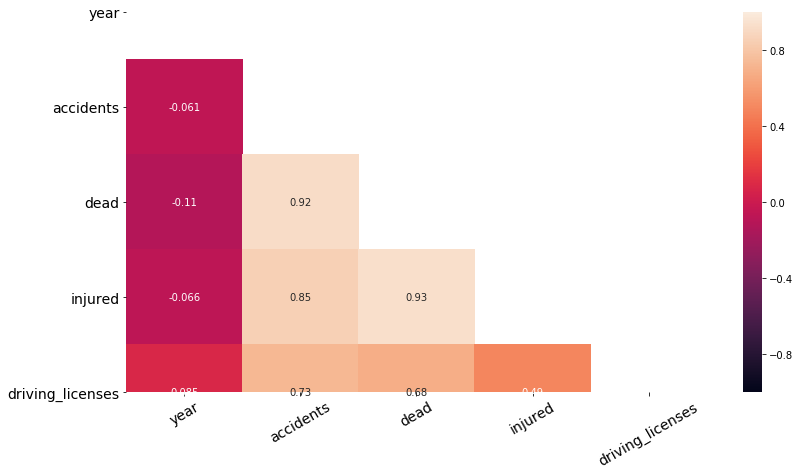

In [80]:
correlation_heat_map(merge_2016_2017)

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [81]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2 , figsize=(10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].hist(dataframe[column]) # feel free to add more settings
        

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

In [82]:
merge_2016_2017.columns

Index(['year', 'region', 'latitude', 'longitude', 'accidents', 'dead',
       'injured', 'driving_licenses'],
      dtype='object')

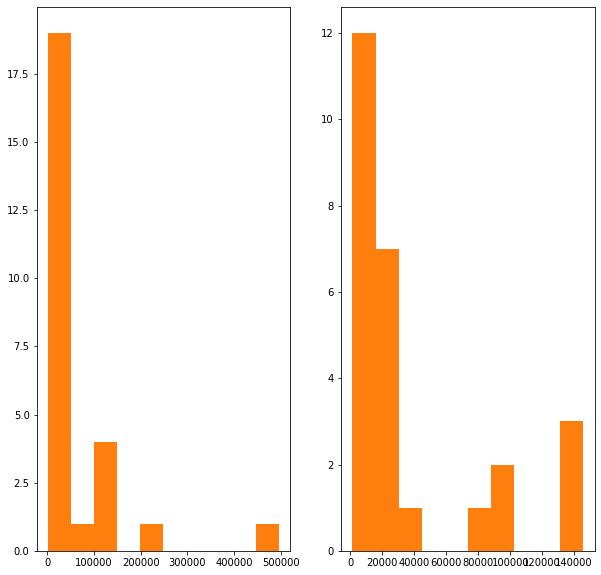

In [83]:
subplot_histograms(merge_2016_2017, ['driving_licenses', 'accidents'], ['accidents histogram', 'licenses histogram'],['number of accidents', 'driving licenses issued'])

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


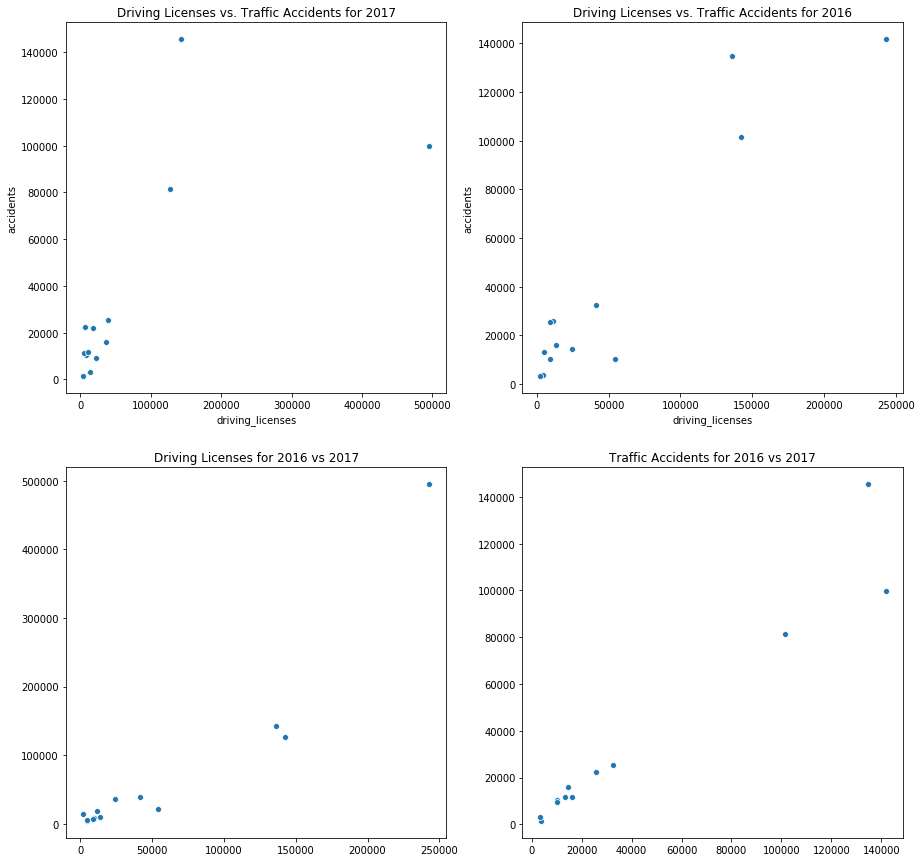

In [84]:
# Code
fig, ax = plt.subplots(ncols=2, nrows=2 ,figsize=(15, 15)) 
sns.scatterplot(merge_2016_2017.loc[merge_2016_2017.year == 2017, 'driving_licenses'],
                merge_2016_2017.loc[merge_2016_2017.year == 2017 , 'accidents'], ax=ax[0,0])

sns.scatterplot(merge_2016_2017.loc[merge_2016_2017.year == 2016, 'driving_licenses'],
                merge_2016_2017.loc[merge_2016_2017.year == 2016 , 'accidents'], ax=ax[0,1])

sns.scatterplot(merge_2016_2017.loc[merge_2016_2017.year == 2016, 'driving_licenses'].values,
                merge_2016_2017.loc[merge_2016_2017.year == 2017 , 'driving_licenses'].values, ax=ax[1,0])

sns.scatterplot(merge_2016_2017.loc[merge_2016_2017.year == 2016, 'accidents'].values,
                merge_2016_2017.loc[merge_2016_2017.year == 2017 , 'accidents'].values, ax=ax[1,1])

ax[0,0].set_title('Driving Licenses vs. Traffic Accidents for 2017')
ax[0,1].set_title('Driving Licenses vs. Traffic Accidents for 2016')
ax[1,0].set_title('Driving Licenses for 2016 vs 2017')
ax[1,1].set_title('Traffic Accidents for 2016 vs 2017')
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [85]:
merge_2016_2017.columns

Index(['year', 'region', 'latitude', 'longitude', 'accidents', 'dead',
       'injured', 'driving_licenses'],
      dtype='object')

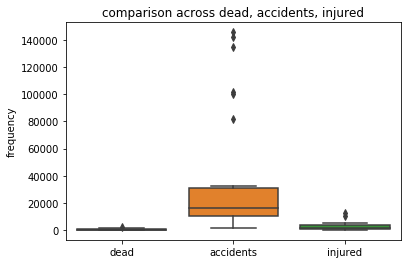

In [86]:
# Code
sns.boxplot(data=merge_2016_2017.loc[:,['dead', 'accidents','injured']])
plt.ylabel('frequency')
plt.title('comparison across dead, accidents, injured');


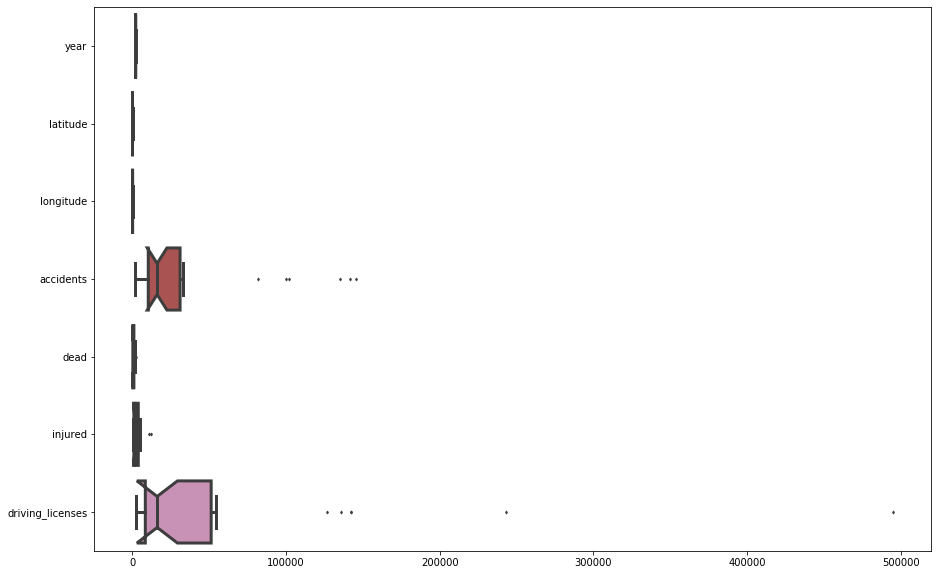

In [87]:
fig, ax = plt.subplots(figsize=(15, 10))
                                #horizantol
sns.boxplot(data=merge_2016_2017, orient='h', fliersize=2, linewidth=3, notch=True, saturation=0.5, ax=ax)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [88]:
merge_2016_2017.columns

Index(['year', 'region', 'latitude', 'longitude', 'accidents', 'dead',
       'injured', 'driving_licenses'],
      dtype='object')

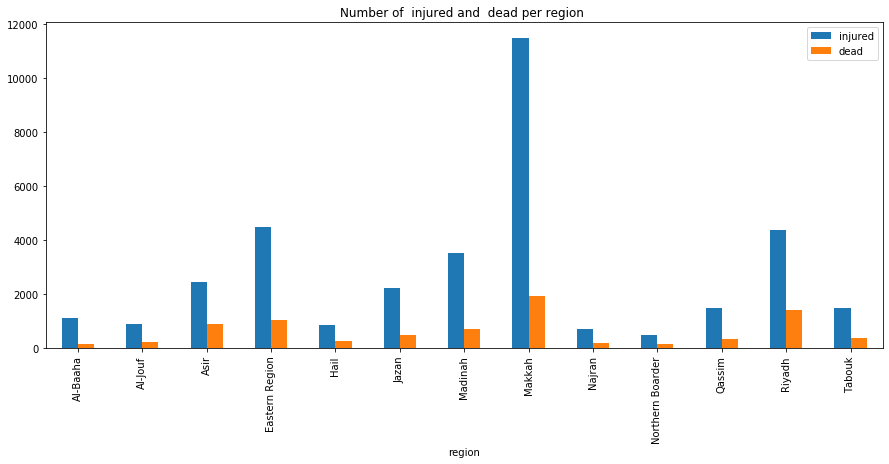

In [89]:
merge_2016_2017.groupby('region')['injured','dead'].mean().plot(kind='bar',figsize=(15,6) ,title=('Number of  injured and  dead per region '))

''

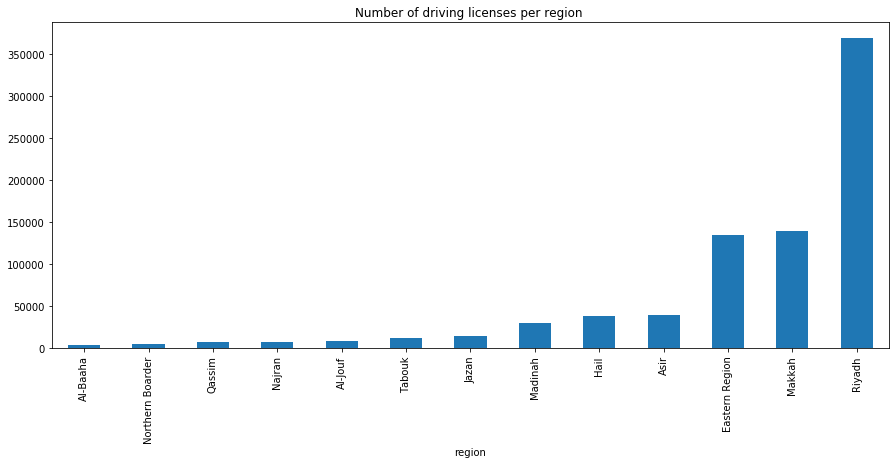

In [90]:
merge_2016_2017.groupby('region').driving_licenses.mean().sort_values().plot(kind='bar',figsize=(15,6) ,title=('Number of driving licenses per region '))
;


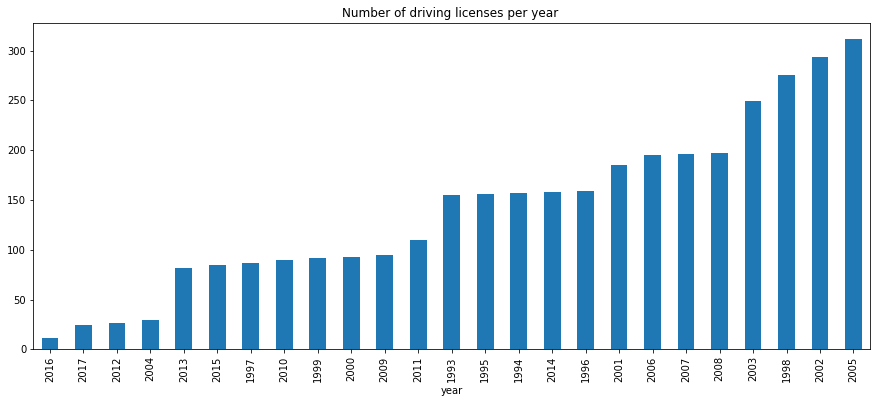

In [91]:
#

merge_1993_2017.groupby(['year'])['driving_licenses'].idxmax().sort_values().plot(kind='bar', figsize=(15,6),title=('Number of driving licenses per year '));

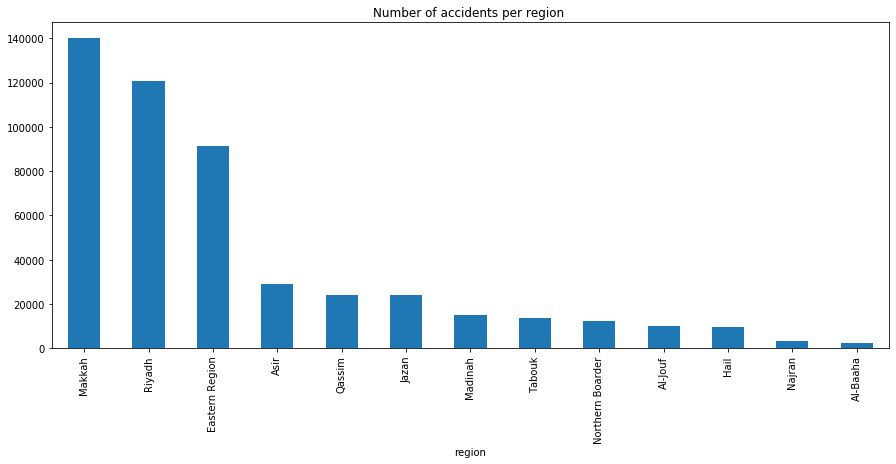

In [92]:
merge_2016_2017.groupby('region').accidents.mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,6),title=('Number of accidents per region '));

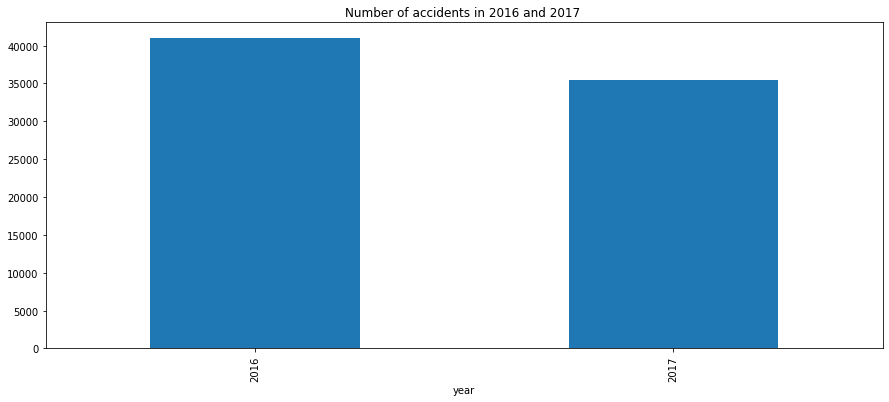

In [93]:
merge_2016_2017.groupby('year').accidents.mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,6),title=('Number of accidents in 2016 and 2017 '));

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [94]:
merge_2016_2017.describe()

,year,accidents,dead,injured,driving_licenses
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,38225.692308,635.384615,2743.038462,62507.000000
std,0.509902,46493.705035,549.783381,2922.641127,107293.917762
min,2016.000000,1414.000000,112.000000,374.000000,2153.000000
25%,2016.000000,10276.250000,241.250000,923.000000,8363.250000
50%,2016.500000,16050.500000,415.500000,1618.500000,16085.000000
75%,2017.000000,30981.250000,929.250000,3784.000000,51222.000000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000


# Answers:
#### accidents
Number of accidents

the mean of accidents is : 38225

the standard deviation of accidents is : 46493

the Minimum Number of accidents is : 1414

the Maximum Number of accidents is : 145541

#### dead
Number of deaths from accidents

the mean of deaths is : 635

the standard deviation of deaths is : 549

the Minimum Number of deaths is : 112

the Maximum Number of deaths is : 2243


#### injured
Number of injured from accidents

the mean of injured is : 2743

the standard deviation of injured is : 2922

the Minimum Number of injured is : 374

the Maximum Number of injured is : 12383


#### driving_licenses
Number of driving licenses

the mean of injured is : 62507

the standard deviation of injured is : 107293

the Minimum Number of injured is : 2153

the Maximum Number of injured is : 495307


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

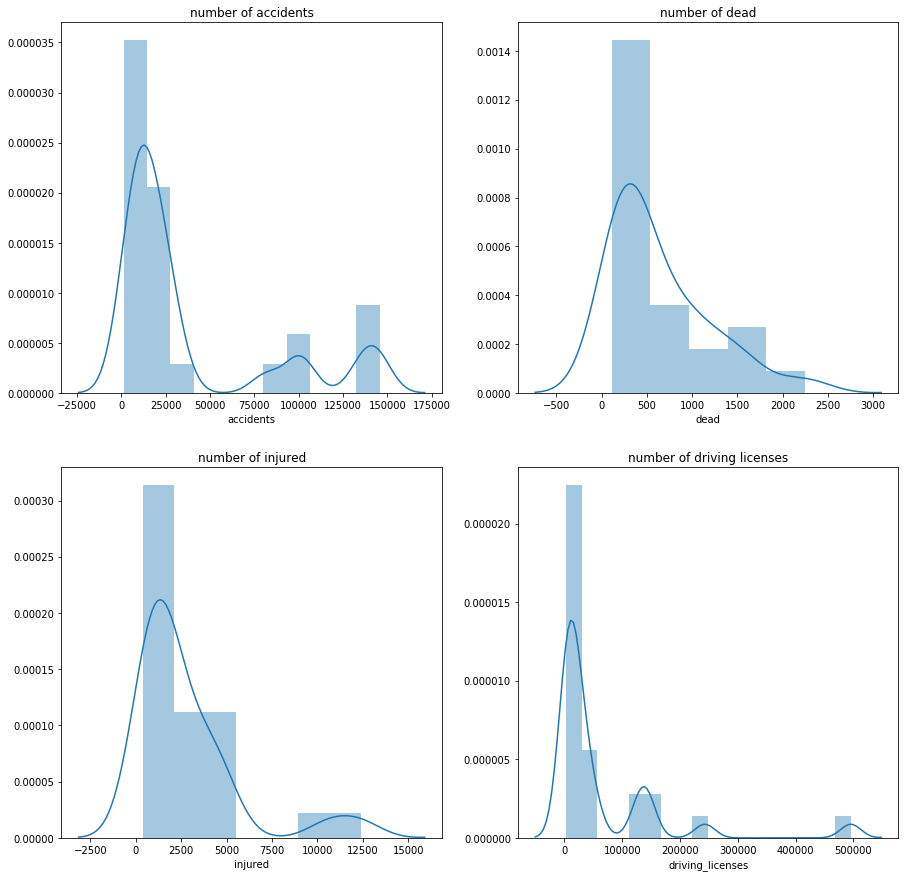

In [95]:

fig, ax = plt.subplots(ncols=2 , nrows=2 , figsize=(15,15))
sns.distplot(merge_2016_2017.accidents, ax=ax[0,0])
sns.distplot(merge_2016_2017.dead, ax=ax[0,1])
sns.distplot(merge_2016_2017.injured, ax=ax[1,0])
sns.distplot(merge_2016_2017.driving_licenses, ax=ax[1,1])

ax[0,0].set_title('number of accidents')
ax[0,1].set_title('number of dead')
ax[1,0].set_title('number of injured')
ax[1,1].set_title('number of driving licenses')
plt.show()

Answer:

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

##### Answer: 

This data is not a normally distribution in my opinion  its a positive skew

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [96]:

t_test = stats.ttest_ind(merge_2016_2017['accidents'],merge_2016_2017['driving_licenses'])
t_test.statistic, t_test.pvalue

(-1.0588063233934542, 0.2947764322629688)

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:
## Based on your exploration of the data, what are you key takeaways and recommendations?

### solutions can be given to the authorities that may contribute to their attempts to decrise the loss that is happing in accedint ,deaths, injuries and cost.

such as : 

- More scrutiny on traffic roles

- Opening or modifying new roads in the future

- Opening lose or modify some exits

- Add more traffic light



## Are there additional data you desire that would better inform your investigations?

### Adding more fetures to helps and do more analysis such as :
- The name of roads or streets
- The time of accident 
- Size of roads or streets